## AUTOML COMO PRIMERA APROXIMACIÓN

<b> PyCaret </b> es una librería low-code de Python pensada para automatizar (con pocas líneas) todo el flujo de machine learning: desde el preprocesado y la comparación de modelos hasta el ajuste de hiperparámetros, interpretación y guardado/despliegue. Soporta tareas de clasificación, regresión, series temporales, clustering y detección de anomalías con una API muy simple.

¿Qué te permite hacer?

* Preprocesar datos (imputación, escalado, target encoding, etc.) y montar un pipeline automáticamente con setup(...). 
* Probar y comparar decenas de modelos con compare_models() y ajustarlos con tune_model(). 
* Ensamblar / apilar modelos, interpretar (gráficos, SHAP) y evaluar con funciones listas para usar. 
* Series temporales con su módulo dedicado (pycaret.time_series). 
* Guardar y desplegar pipelines (save_model, load_model) y registrar experimentos; se apoya en librerías como scikit-learn, XGBoost, LightGBM y CatBoost. 

¿Cuándo usarlo?

* Para prototipado rápido, obtener baselines sólidos y comparar alternativas sin escribir mucho código.
* Cuando quieres centrarte en el análisis más que en los detalles de implementación.


In [1]:
import pandas as pd
import pycaret
from pycaret.classification import *
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [2]:
df_bank = pd.read_csv('bank-full.csv', sep=';')

In [3]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df_bank['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [5]:
df_bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
setup(data=df_bank, target='y',session_id=123) # Aplicando el dataset, realiza todo el prceso inicial de ML

,Description,Value
0,Session id,123
1,Target,y
2,Target type,Binary
3,Target mapping,"no: 0, yes: 1"
4,Original data shape,"(45211, 17)"
5,Transformed data shape,"(45211, 49)"
6,Transformed train set shape,"(31647, 49)"
7,Transformed test set shape,"(13564, 49)"
8,Numeric features,7
9,Categorical features,9


In [7]:
models() # Muestra los distintos modelos y su id

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [8]:
best_model = compare_models(include=['rf','lr','dt']) # Compara los tres modelos que le hemos dicho, en reste caso regresion logistica, random forest classificer y arbol de decision. Los modelos que hemos trabajado

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:02:16
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9046,0.9279,0.9046,0.8917,0.8933,0.4358,0.4555,1.1510
lr,Logistic Regression,0.9006,0.9045,0.9006,0.8854,0.8867,0.3945,0.4190,1.3600
dt,Decision Tree Classifier,0.8773,0.7075,0.8773,0.8785,0.8778,0.4114,0.4116,0.1960


In [9]:
model_rf = create_model('rf') # Crea un modelo, que en este caso es el random forets, que es el mejor modelo según la función compare_models()

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8967,0.9303,0.8967,0.8821,0.8856,0.4006,0.4151
1,0.9052,0.9261,0.9052,0.8928,0.8944,0.4446,0.4628
2,0.9021,0.9233,0.9021,0.8878,0.8895,0.4127,0.4342
3,0.9027,0.9262,0.9027,0.8895,0.8918,0.4297,0.4468
4,0.9055,0.9319,0.9055,0.8930,0.8945,0.4424,0.4616
5,0.9043,0.9275,0.9043,0.8908,0.8917,0.4234,0.4466
6,0.9033,0.9228,0.9033,0.8894,0.8905,0.4169,0.4400
7,0.9052,0.9262,0.9052,0.8923,0.8936,0.4365,0.4571
8,0.9121,0.9330,0.9121,0.9020,0.9028,0.4896,0.5071


In [10]:
print(model_rf) # Printea el modelo

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


In [11]:
tune_model_rf= tune_model(model_rf) # Tuneo de hiperparámetros

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8913,0.8648,0.8913,0.8729,0.8770,0.3465,0.3656
1,0.9093,0.8850,0.9093,0.8982,0.8993,0.4710,0.4893
2,0.9005,0.8672,0.9005,0.8845,0.8824,0.3595,0.3980
3,0.8976,0.8736,0.8976,0.8806,0.8821,0.3659,0.3929
4,0.9046,0.8776,0.9046,0.8911,0.8876,0.3888,0.4286
5,0.8970,0.8628,0.8970,0.8795,0.8809,0.3582,0.3862
6,0.8970,0.8732,0.8970,0.8801,0.8823,0.3696,0.3936
7,0.9023,0.8777,0.9023,0.8892,0.8917,0.4303,0.4465
8,0.9087,0.8915,0.9087,0.8979,0.8999,0.4775,0.4915


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [12]:
print(tune_model_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


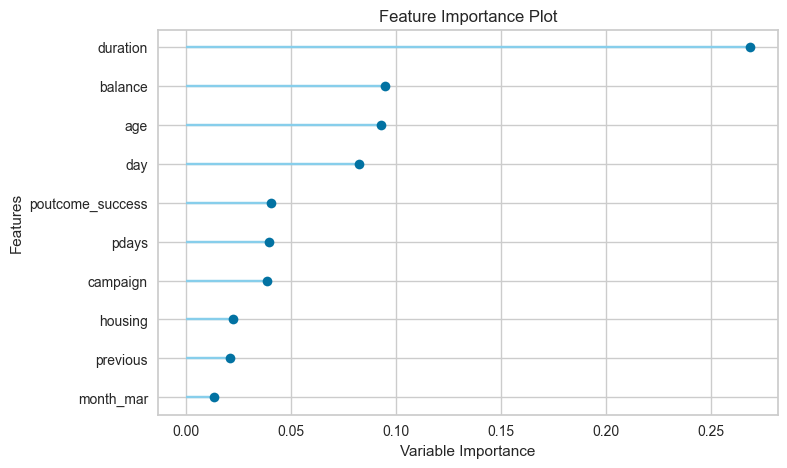

In [13]:
plot_model(tune_model_rf,plot='feature') # Para plotear los distintos tipso de graficos, este en función de la feature_importances

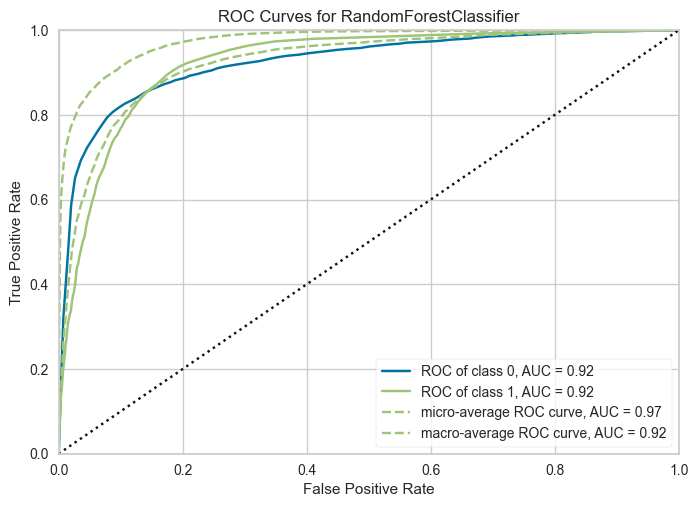

In [14]:
plot_model(tune_model_rf,plot='auc') # Para plotear los distintos tipso de graficos, este la curva ROC

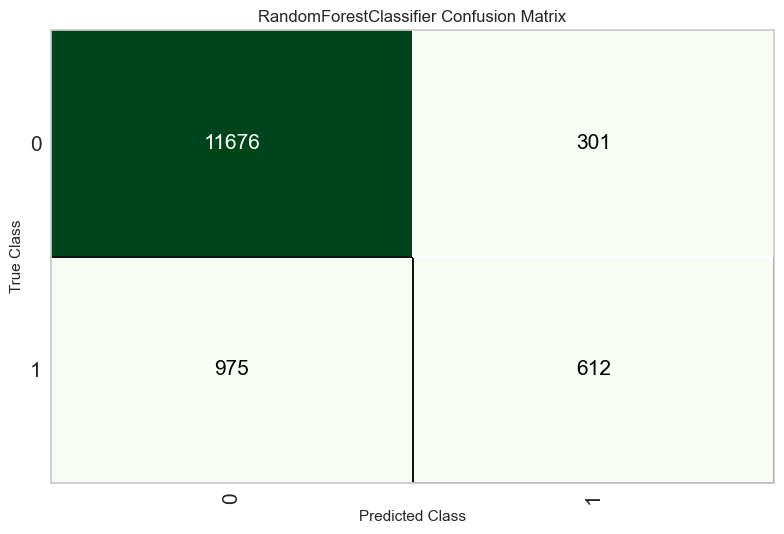

In [15]:
plot_model(tune_model_rf,plot='confusion_matrix')  # Para plotear los distintos tipso de graficos, este la matriz de confusión

In [16]:
predictions = predict_model(best_model,data=df_bank)
predictions.head() # Predicciones

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9718,0.9873,0.9718,0.9712,0.9709,0.8554,0.8579


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,prediction_label,prediction_score
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,no,0.99
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,no,1.00
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,no,1.00
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,no,1.00
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,no,0.99


In [17]:
save_model(best_model,'my_best_pipeline') # Guardar el modelo

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'balance', 'day',
                                              'duration', 'campaign', 'pdays',
                                              'previous'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
            

In [18]:
loaded_model= load_model('my_best_pipeline') # Cargar el modelo guardado anteriormente 

Transformation Pipeline and Model Successfully Loaded


In [19]:
loaded_model

Pipeline(memory=FastMemory(location=C:\Users\pauri\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'balance', 'day',
                                             'duration', 'campaign', 'pdays',
                                             'previous'],
                                    transformer=SimpleImputer(add_indica...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        monotonic_cst=None, n_estimators=100,
                                        n_jobs=-1, oob_score=False,
                                        random_state=123, verbose=0,
                                        warm_start=False))],
         verbose=False)

In [20]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [21]:
X_train = get_config('X_train_transformed') # obtener los X_train, X_test... transformados
y_train = get_config('y_train_transformed')

X_test = get_config('X_test_transformed')
y_test = get_config('y_test_transformed')

In [ ]:
X_train # para ver la transormación que ha aplicado a cada una de las variables

In [22]:
model1 = RandomForestClassifier()
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11977
           1       0.67      0.39      0.49      1587

    accuracy                           0.91     13564
   macro avg       0.80      0.68      0.72     13564
weighted avg       0.89      0.91      0.89     13564

